   # <center> RESTAURANT RATING PREDICTION PROJECT </center>

 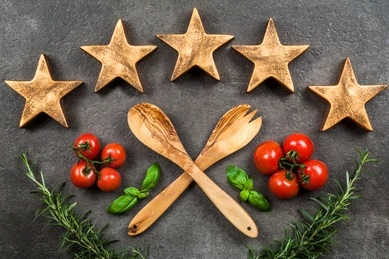  

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Reading the dataset

In [3]:
data = pd.read_csv(r'D:\datasets\Zomato.csv')

In [4]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# Summarising the data

In [5]:
#checking the shape of dataset
data.shape

(51717, 17)

In [6]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Data Cleaning

In [8]:
#checking the missing values
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df = data.drop(['url', 'phone'], axis = 1) # dropped 'url' and 'phone' columns

In [10]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
#handling the null or missing values
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [13]:
#checking the duplicates & handling the duplicates values
df.duplicated().sum()

11

In [14]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [15]:
#Renaming the columns appropriately
df = df.rename(columns = {'approx_cost(for two people)':'cost',
                         'listed_in(type)':'type', 'listed_in(city)': 'city'})

In [16]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
 #cleaning the "cost" column
 df['cost'].unique()   

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [18]:
df['cost'] = df['cost'].apply(lambda x:x.replace(',', '')) # lo
df['cost'] = df['cost'].astype(float)

In [19]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [52]:
#handling the rate columns
#here rating column is of string type. we have to convert them into numeric type. we have to remove the '/5' form given values. there is 'NEW' value which make no sense. SO we have to remove that values.
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [53]:
df = df.loc[df.rate != 'NEW'] # geting rid of 'NEW'

In [54]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [55]:
df['rate'] = df['rate'].apply(lambda x:x.replace('/5', ''))

df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [56]:
df['rate'] = df['rate'].apply(lambda x: float(x))
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23248, dtype: float64

# Data Visualization

##  Most famous restaurant chains in banaglore

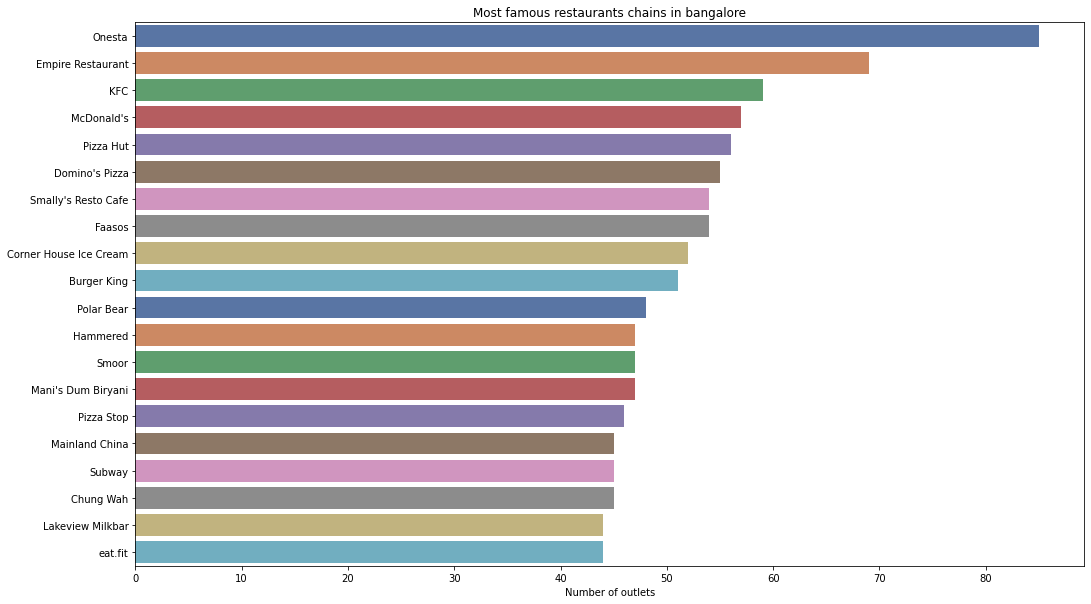

In [20]:
plt.figure(figsize = (17,10))
chains = df['name'].value_counts()[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Most famous restaurants chains in bangalore')
plt.xlabel('Number of outlets')
plt.show()


## Plot Restaurant Names vs No of locations

In [21]:
df.name.value_counts().head()

Onesta               85
Empire Restaurant    69
KFC                  59
McDonald's           57
Pizza Hut            56
Name: name, dtype: int64

Text(0.5, 1.0, 'Restaurant Names vs No of locations')

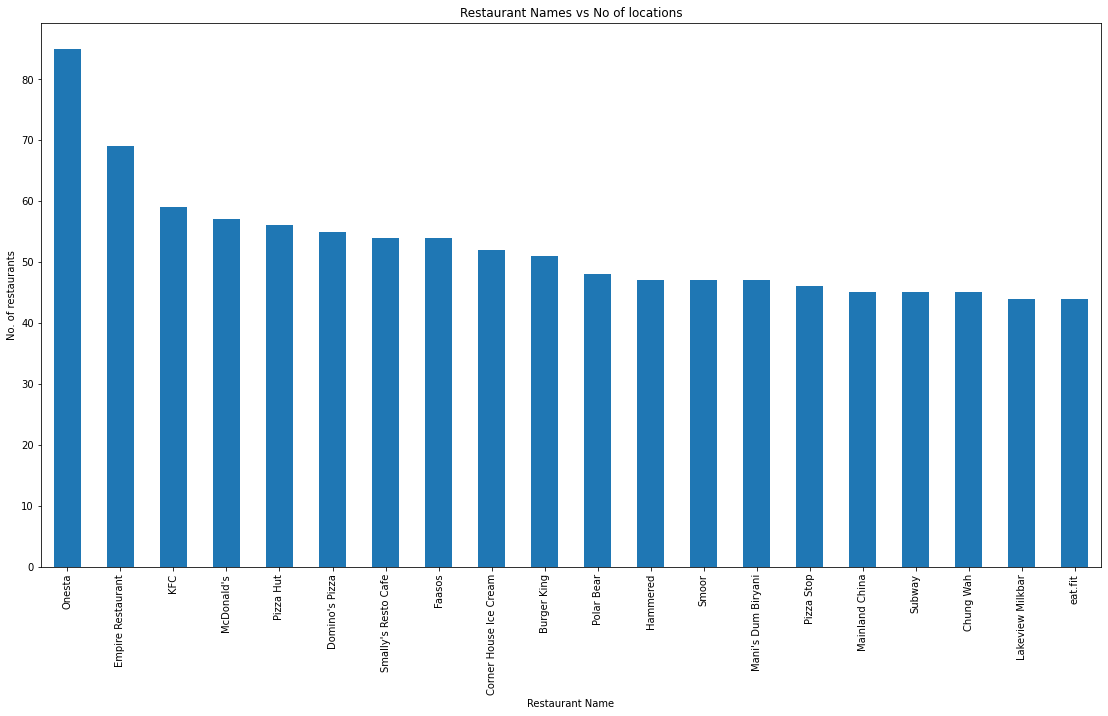

In [49]:
# Plot Restaurant Names vs No of locations
plt.figure(figsize = (19,10))
ax = df.name.value_counts()[:20].plot(kind = 'bar')
plt.xlabel("Restaurant Name")
plt.ylabel("No. of restaurants")
plt.title('Restaurant Names vs No of locations')

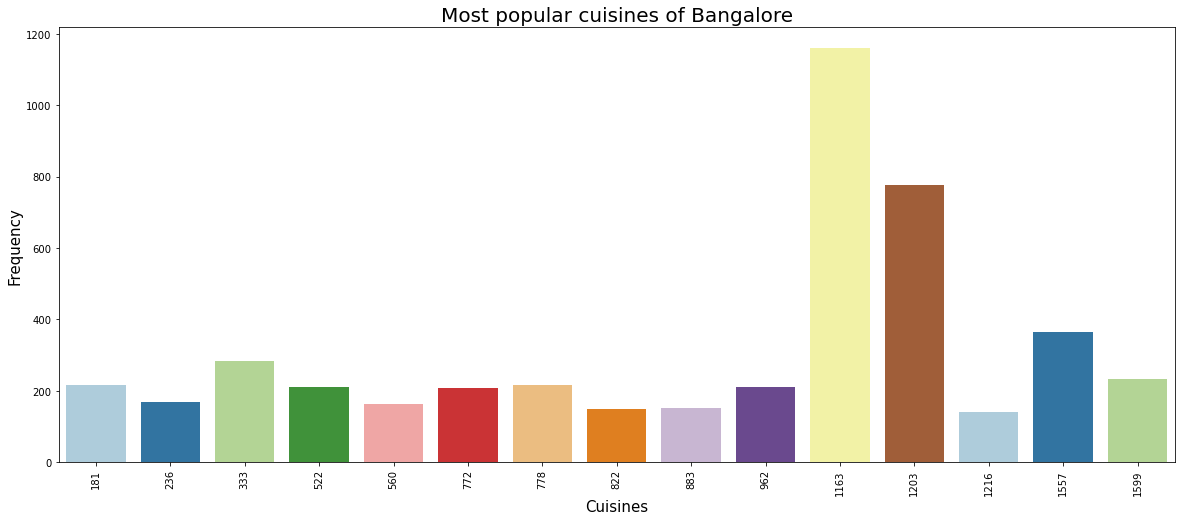

In [51]:
v = df['cuisines'].value_counts()[:15]
plt.figure(figsize = (20,8))

ax  = sns.barplot(x = v.index, y = v, palette = 'Paired')


plt.title('Most popular cuisines of Bangalore', fontsize = 20)
plt.xlabel('Cuisines', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

## Plot Online vs Offline Orders

In [26]:
df.online_order.value_counts()

Yes    16439
No      6956
Name: online_order, dtype: int64

Text(0.5, 1.0, 'Online/Offline Orders Count')

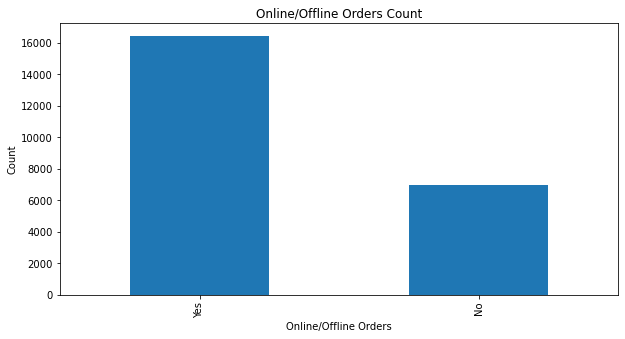

In [29]:
# Plot Online vs Offline Orders
plt.figure(figsize=(10,5))
ax = df.online_order.value_counts().plot(kind = 'bar')
plt.xlabel("Online/Offline Orders")
plt.ylabel("Count")
plt.title("Online/Offline Orders Count")

## Restaurant Type

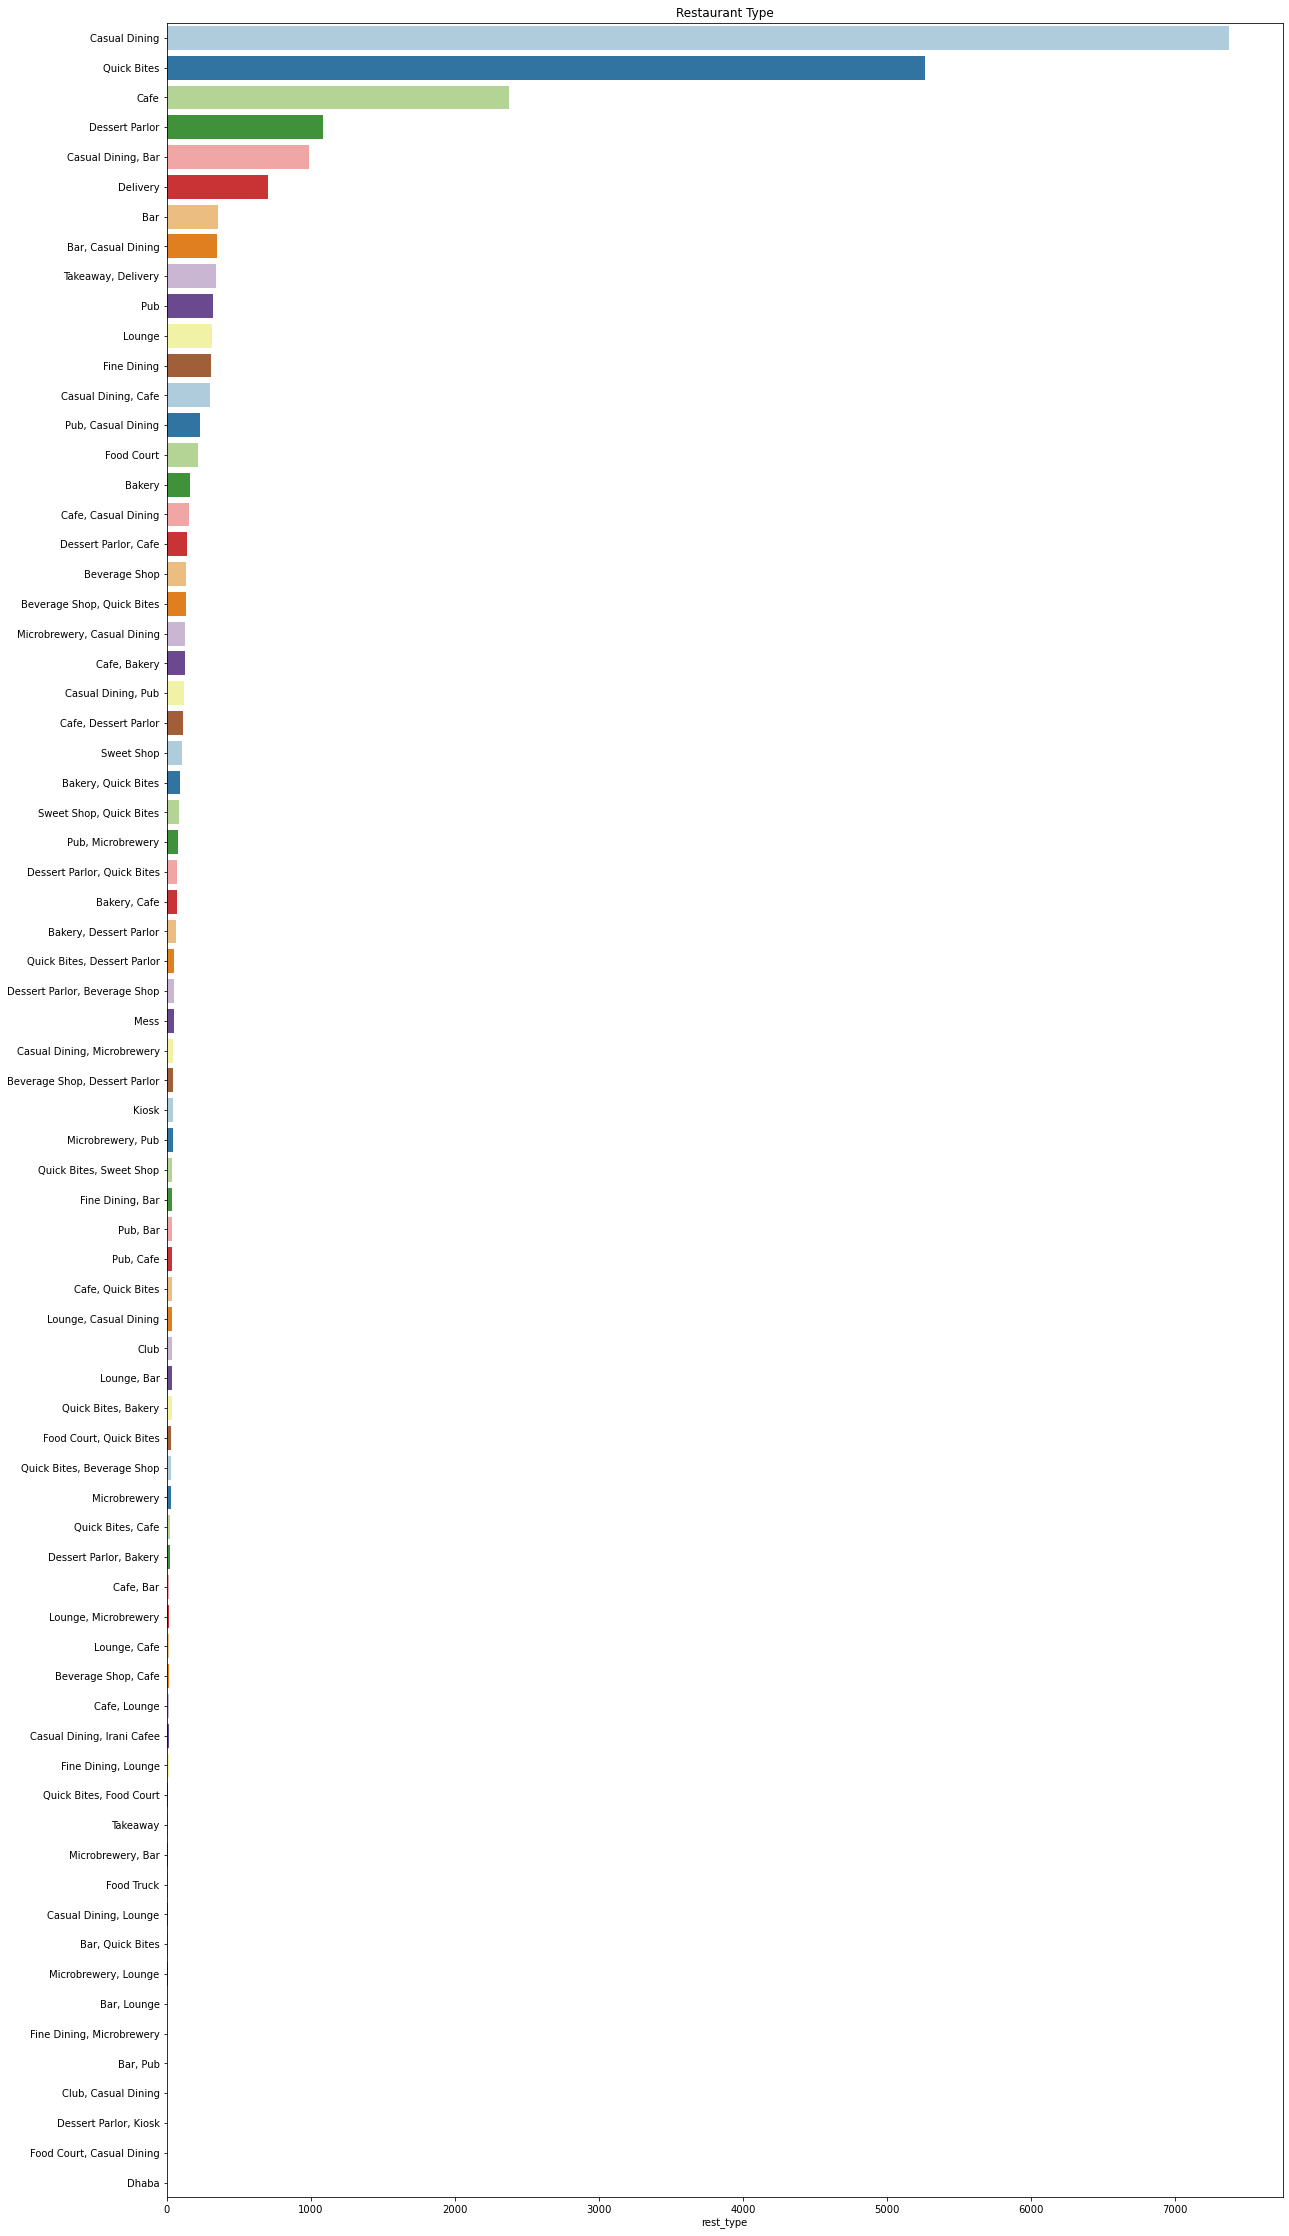

In [30]:
plt.figure(figsize = (20,40))
t = df['rest_type'].value_counts()
sns.barplot(y = t.index ,x = t, palette = 'Paired')
plt.title('Restaurant Type')
plt.show()
plt.show()

##  Distribution of Cost of Food for two People

C:\Users\RAKESH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


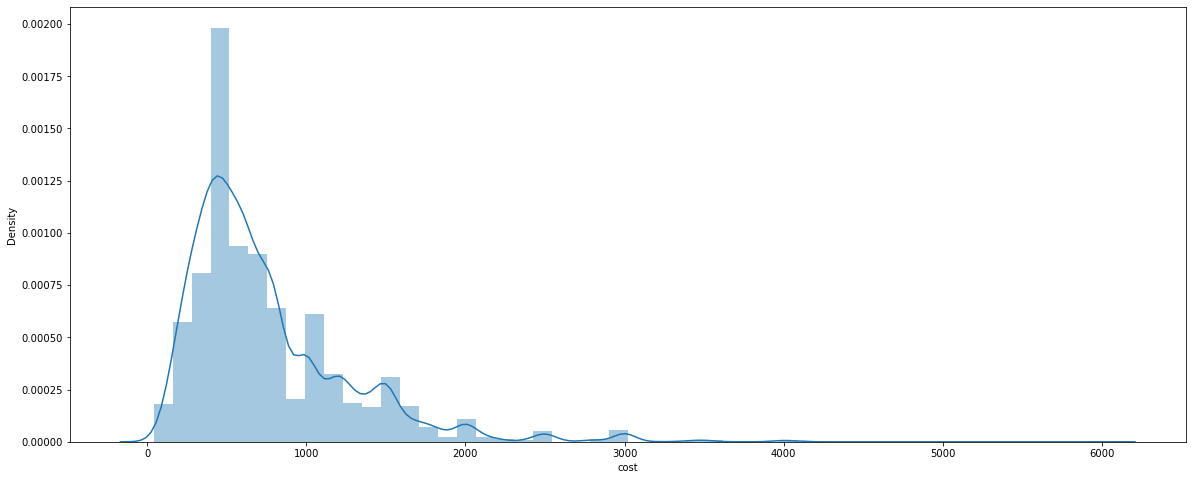

In [31]:
plt.figure(figsize=(20,8))
sns.distplot(df['cost'])
plt.show()

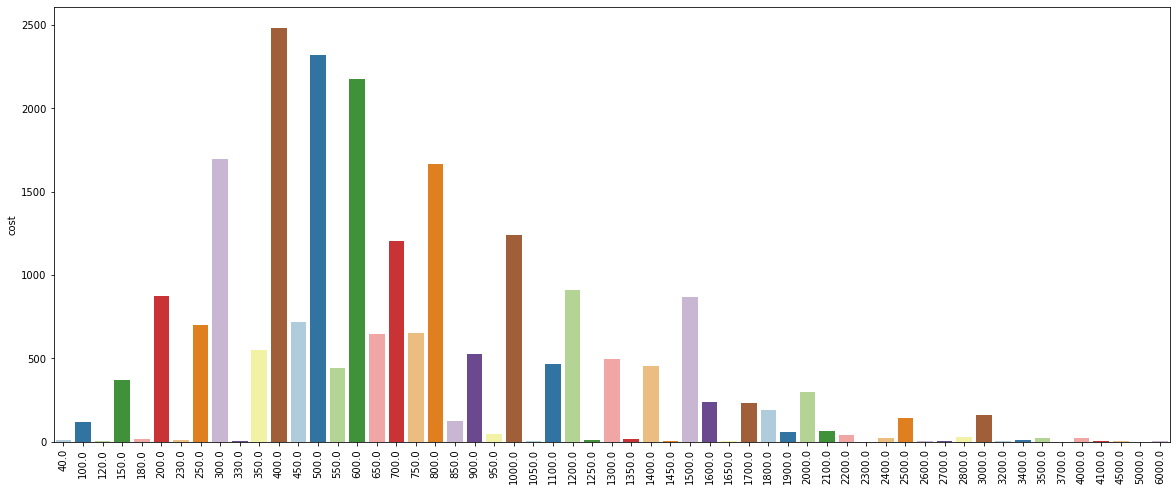

In [32]:
v = df['cost'].value_counts()
plt.figure(figsize = (20,8))

sns.barplot(x = v.index, y = v, palette = 'Paired')
plt.xticks(rotation  =90)
plt.show()

## Services Types

C:\Users\RAKESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAKESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


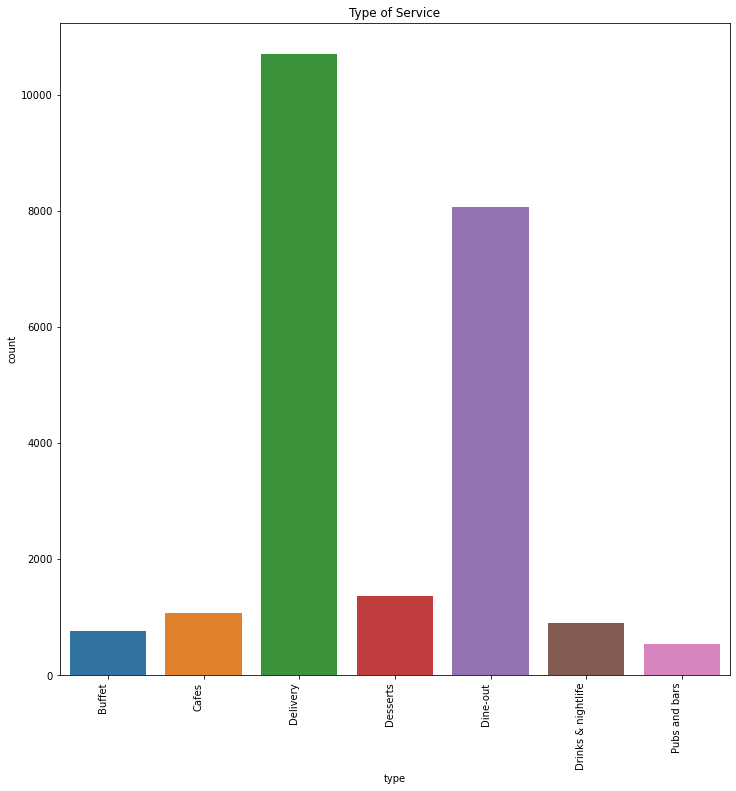

In [33]:
#Types of Services

ax  = sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)

plt.title('Type of Service')
plt.show()

## Plot location with highest no of restaurants

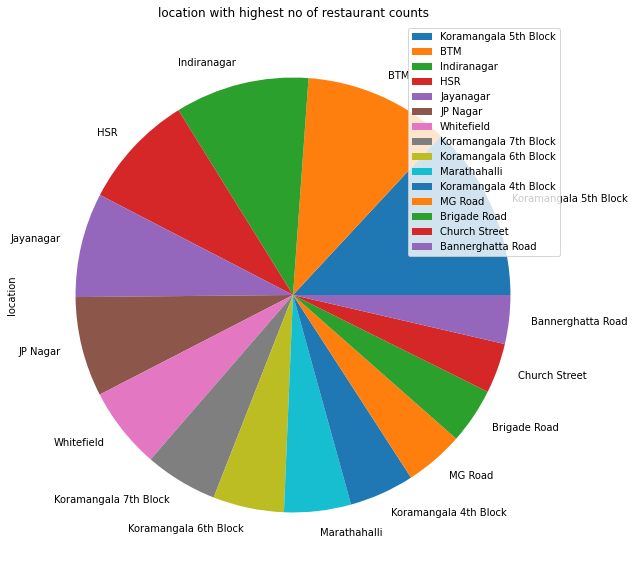

In [34]:
plt.figure(figsize=(10,10))
ax = df.location.value_counts()[:15].plot(kind = 'pie')
plt.title("location with highest no of restaurant counts")
plt.legend()

# Data preparing

In [58]:
#  Convert the online categorical variables into a numeric format
df.online_order[df.online_order == 'Yes'] = 1
df.online_order[df.online_order == 'No'] =  0

<ipython-input-58-6527f97f2954>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order[df.online_order == 'Yes'] = 1
<ipython-input-58-6527f97f2954>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order[df.online_order == 'No'] =  0


In [59]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

## Label Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

df.book_table = le.fit_transform(df.book_table)

In [61]:
df.head(n=2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari


In [62]:
my_data = df.iloc[:,[2,3,4,5,6,7,9,10,12]]

my_data.to_csv('Zomato_df.csv')

In [63]:
my_data.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047


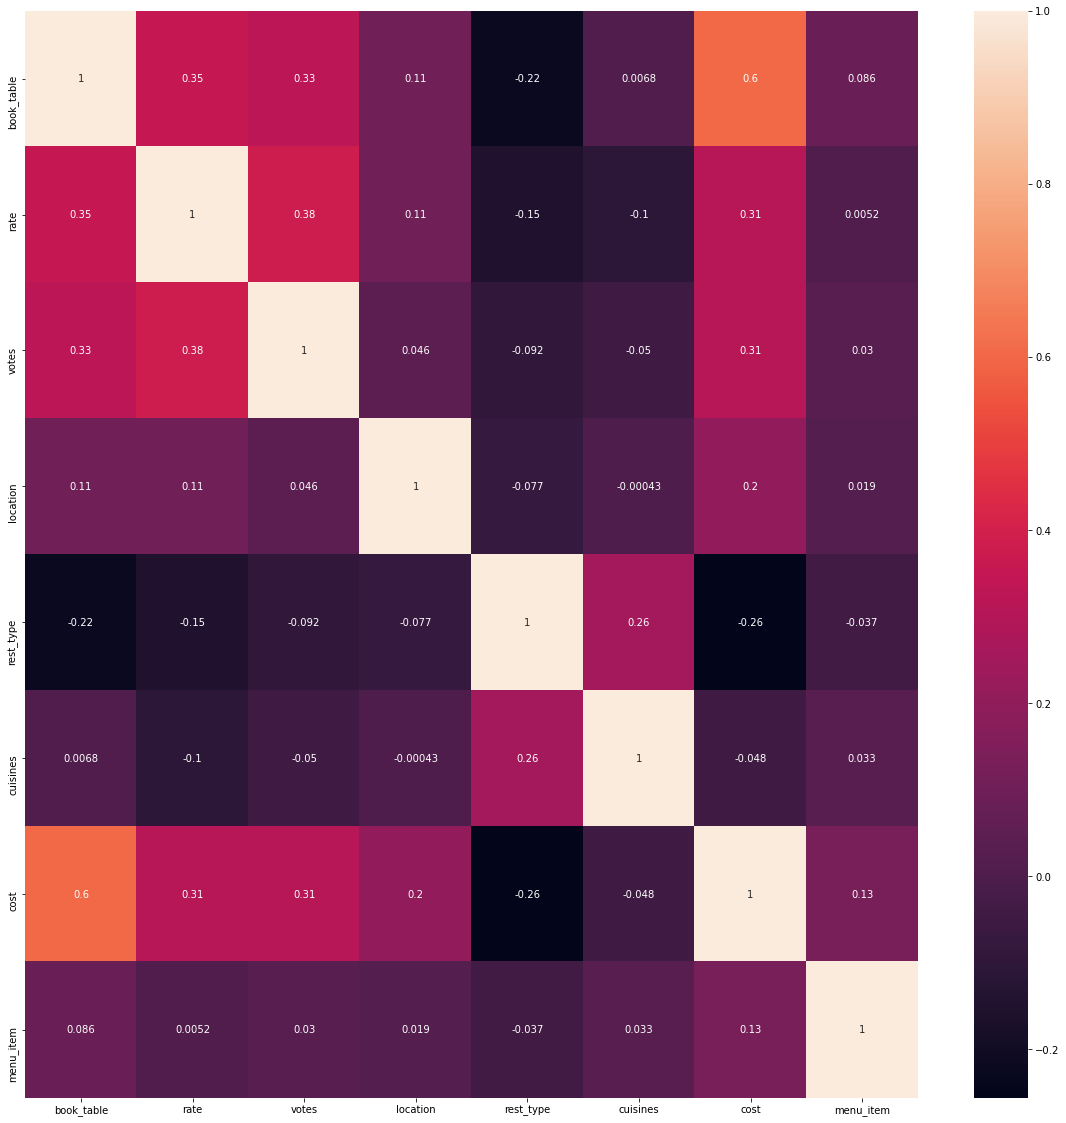

In [64]:
plt.figure(figsize = (20,20))
sns.heatmap(my_data.corr(), annot = True)
plt.show()

## MODEL TRAINING

In [65]:
X = df.iloc[:,[2,3,5,6,7,9,10,12]]
y = df['rate']

In [66]:
X

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...
51705,1,1,128,84,5,1318,1200.0,5047
51707,0,0,77,84,38,878,2000.0,5047
51708,0,0,161,84,21,539,1200.0,5047
51711,0,0,81,84,21,80,800.0,5047


In [67]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23248, dtype: float64

In [68]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [69]:
X_train

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
38077,1,1,232,49,5,122,2000.0,5047
12580,1,1,3485,48,61,646,1700.0,5047
50065,1,1,977,71,57,669,1500.0,1171
11049,0,0,118,30,20,1185,800.0,5047
48098,0,1,497,65,54,1124,2000.0,5047
...,...,...,...,...,...,...,...,...
21061,1,1,871,30,20,1296,900.0,5047
16836,1,0,450,22,20,1209,550.0,5047
39407,0,1,592,67,20,1156,1200.0,5047
16843,0,0,196,38,29,838,500.0,5047


In [70]:
y_train

38077    4.4
12580    4.3
50065    4.0
11049    3.9
48098    4.3
        ... 
21061    4.0
16836    3.9
39407    4.3
16843    3.8
39332    3.1
Name: rate, Length: 16273, dtype: float64

## LINEAR REGRESSION

In [71]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

#predict the test set
y_pred = lr.predict(X_test)

## Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.22818828522967394


## Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=0.01)

dtr.fit(X_train,y_train)

# Predict the test ser
y_pred  = dtr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.374189838942661


## Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
rfr.fit(X_train,y_train)

# Predict the test ser
y_pred  = rfr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.8809706960047533


## Support vector Regressor

In [74]:
from sklearn.svm import SVR
svr = SVR(kernel ='rbf')

svr.fit(X_train, y_train)

# predict the test set
y_pred = svr.predict(X_test)

# Evaluate the performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.24327610722747917


## Conclusion :

1. From the analysis, 'Onesta', 'Empire Restaurant' & 'KFC' are the most famous restaurants in bangalore.
2. Most Restaurants offer options for online order and delivery.
3. Most restaurants don't offer table booking.
4. From the analysis, most of the ratings are within 3.5 and 4.5.
5. From the analysis. we can see that most of the restaurants located in 'Koramangala 5th Block', 'BTM' & 'Indiranagar'.Then least restaurants are located 'KR Puram', 'Kanakapura', 'Magadi Road'.
6. 'Casual Dining', 'Quick Bites', 'Cafe', 'Dessert Parlor' are the most common types of restaurant.And 'Food Court', 'Casual Dining', 'Dhaba' are the least common.
7. From the analysis, pasta & Pizza most famous food in bangalore restaurants.
8. From the analysis, we can see that North Indian Cuisines are most famous in bangalore restaurants.
9. Two main service types are Delivery and Dine-out.
10. From the analysis, we can see that 'Onesta', 'Truffles' & 'Empire Restaurant' are highly voted restaurants.
11. For the modeling part, i used LinearRegression, DecisionTree Regressor, RandomForest Regressor , Supprotvector Regressor. Out of which random forest regressor performed best.